In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Import the data set
DAM_Vehicle = pd.read_csv('DAM_Vehicle.csv')
DAM_Vehicle.head()

,Compactness,Circularity,Distance Circularity,Radius Ratio,PR. Axis Aspect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,PR. Axis Rectangularity,Max Length Rectangularity,Scaled Variance Along Major Axis,Scaled Variance Along Minor Axis,Scaled Radius of Gyration,Skewness About Major Axis,Skewness About Minor Axis,Kurtosis About Minor Axis,Kurtosis About Major Axis,Hollows Ratio,Type of Vehicle
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [3]:
DAM_Vehicle = DAM_Vehicle.astype({"Type of Vehicle":'category'})

In [4]:
DAM_Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
Compactness                         846 non-null int64
Circularity                         846 non-null int64
Distance Circularity                846 non-null int64
Radius Ratio                        846 non-null int64
PR. Axis Aspect Ratio               846 non-null int64
Max Length Aspect Ratio             846 non-null int64
Scatter Ratio                       846 non-null int64
Elongatedness                       846 non-null int64
PR. Axis Rectangularity             846 non-null int64
Max Length Rectangularity           846 non-null int64
Scaled Variance Along Major Axis    846 non-null int64
Scaled Variance Along Minor Axis    846 non-null int64
Scaled Radius of Gyration           846 non-null int64
Skewness About Major Axis           846 non-null int64
Skewness About Minor Axis           846 non-null int64
Kurtosis About Minor Axis           846 non-null int64
Kurtosis About 

In [5]:
vehicle_type = pd.DataFrame(DAM_Vehicle['Type of Vehicle'])
vehicle_type.head()

,Type of Vehicle
0,van
1,van
2,saab
3,van
4,bus


In [6]:
condition1 = DAM_Vehicle['Type of Vehicle']=="van"
condition1.value_counts()

False    647
True     199
Name: Type of Vehicle, dtype: int64

In [7]:
Compactness = pd.DataFrame(DAM_Vehicle['Compactness'])
Circularity = pd.DataFrame(DAM_Vehicle['Circularity'])
Distance_Circularity = pd.DataFrame(DAM_Vehicle['Distance Circularity'])
Radius_Ratio = pd.DataFrame(DAM_Vehicle['Radius Ratio'])
PR_Axis_Aspect_Ratio = pd.DataFrame(DAM_Vehicle['PR. Axis Aspect Ratio'])
Max_Length_Aspect_Ratio = pd.DataFrame(DAM_Vehicle['Max Length Aspect Ratio'])
Scatter_Ratio = pd.DataFrame(DAM_Vehicle['Scatter Ratio'])
Elongatedness = pd.DataFrame(DAM_Vehicle['Elongatedness'])
PR_Axis_Rectangularity = pd.DataFrame(DAM_Vehicle['PR. Axis Rectangularity'])
Max_Length_Rectangularity = pd.DataFrame(DAM_Vehicle['Max Length Rectangularity'])
Scaled_Variance_Along_Major_Axis = pd.DataFrame(DAM_Vehicle['Scaled Variance Along Major Axis'])
Scaled_Variance_Along_Minor_Axis = pd.DataFrame(DAM_Vehicle['Scaled Variance Along Minor Axis'])
Scaled_Radius_of_Gyration = pd.DataFrame(DAM_Vehicle['Scaled Radius of Gyration'])
Skewness_About_Major_Axis = pd.DataFrame(DAM_Vehicle['Skewness About Major Axis'])
Skewness_About_Minor_Axis = pd.DataFrame(DAM_Vehicle['Skewness About Minor Axis'])
Kurtosis_About_Minor_Axis = pd.DataFrame(DAM_Vehicle['Kurtosis About Minor Axis'])
Kurtosis_About_Major_Axis = pd.DataFrame(DAM_Vehicle['Kurtosis About Major Axis'])
Hollows_Ratio = pd.DataFrame(DAM_Vehicle['Hollows Ratio'])

# uni variate decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, vehicle_type, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [9]:
score = [acc_score(Compactness), acc_score(Circularity), acc_score(Distance_Circularity), acc_score(Radius_Ratio), acc_score(PR_Axis_Aspect_Ratio), 
         acc_score(Max_Length_Aspect_Ratio), acc_score(Scatter_Ratio), acc_score(Elongatedness), acc_score(PR_Axis_Rectangularity), acc_score(Max_Length_Rectangularity),
        acc_score(Scaled_Variance_Along_Major_Axis), acc_score(Scaled_Variance_Along_Minor_Axis), acc_score(Scaled_Radius_of_Gyration),
        acc_score(Skewness_About_Major_Axis), acc_score(Skewness_About_Minor_Axis), acc_score(Kurtosis_About_Minor_Axis), acc_score(Kurtosis_About_Major_Axis),
        acc_score(Hollows_Ratio)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['Compactness', 'Circularity', 'Distance_Circularity', 'Radius_Ratio',
                               'PR_Axis_Aspect_Ratio', 'Max_Length_Aspect_Ratio', 'Scatter_Ratio', 'Elongatedness',
                              'PR_Axis_Rectangularity', 'Max_Length_Rectangularity', 'Scaled_Variance_Along_Major_Axis',
                              'Scaled_Variance_Along_Minor_Axis','Scaled_Radius_of_Gyration','Skewness_About_Major_Axis',
                              'Skewness_About_Minor_Axis','Kurtosis_About_Minor_Axis','Kurtosis_About_Major_Axis','Hollows_Ratio'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
Kurtosis_About_Minor_Axis,0.287736
Skewness_About_Minor_Axis,0.287736
Max_Length_Rectangularity,0.330189
Scaled_Radius_of_Gyration,0.334906
Skewness_About_Major_Axis,0.339623
Radius_Ratio,0.367925
PR_Axis_Aspect_Ratio,0.372642
Compactness,0.382075
Kurtosis_About_Major_Axis,0.386792
Hollows_Ratio,0.405660


# multivariate decision tree

In [10]:
# Concat all the individual factors
factors2 = pd.concat([ Compactness, Circularity, Distance_Circularity, Radius_Ratio,
                               PR_Axis_Aspect_Ratio, Max_Length_Aspect_Ratio, Scatter_Ratio, Elongatedness,
                              PR_Axis_Rectangularity, Max_Length_Rectangularity, Scaled_Variance_Along_Major_Axis,
                              Scaled_Variance_Along_Minor_Axis,Scaled_Radius_of_Gyration,Skewness_About_Major_Axis,
                              Skewness_About_Minor_Axis,Kurtosis_About_Minor_Axis,Kurtosis_About_Major_Axis,Hollows_Ratio], sort = False, axis = 1)
factors2.head()

,Compactness,Circularity,Distance Circularity,Radius Ratio,PR. Axis Aspect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,PR. Axis Rectangularity,Max Length Rectangularity,Scaled Variance Along Major Axis,Scaled Variance Along Minor Axis,Scaled Radius of Gyration,Skewness About Major Axis,Skewness About Minor Axis,Kurtosis About Minor Axis,Kurtosis About Major Axis,Hollows Ratio
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [11]:
# Extract Response and Predictors
y = vehicle_type
X = pd.DataFrame(factors2)
X.head()

,Compactness,Circularity,Distance Circularity,Radius Ratio,PR. Axis Aspect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,PR. Axis Rectangularity,Max Length Rectangularity,Scaled Variance Along Major Axis,Scaled Variance Along Minor Axis,Scaled Radius of Gyration,Skewness About Major Axis,Skewness About Minor Axis,Kurtosis About Minor Axis,Kurtosis About Major Axis,Hollows Ratio
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [12]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (634, 1) (634, 18)
Test Set  : (212, 1) (212, 18)


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.7381703470031546

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.6745283018867925



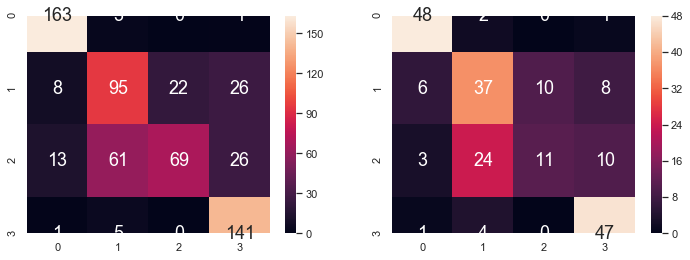

In [14]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest

In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

C:\Users\elroy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
train_pred = model.predict(X_train)
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

In [17]:
print("Classification accuracy for train data: ", accuracy_score(y_train, train_pred))
print("Classification accuracy for test data: ", accuracy_score(y_test, rf_predictions))

Classification accuracy for train data:  1.0
Classification accuracy for test data:  0.7075471698113207


# Logistic Regression

In [18]:
# Import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
# Fit Logistic Regression on Train Data 
LR.fit(X_train,y_train.values.ravel())

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8249211356466876

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7924528301886793



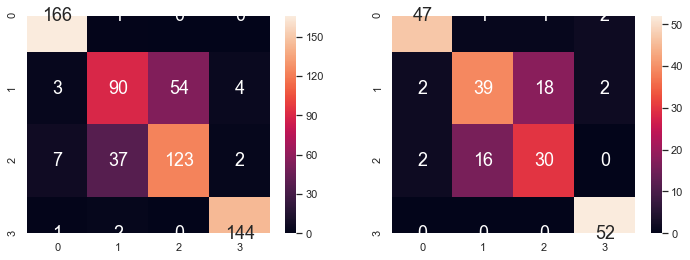

In [19]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K-Nearest Neighbours

In [20]:
# Import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=25) # k = squareroot N, where N is the number of training data (sqrt(0.75x846))
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6561514195583596

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5849056603773585



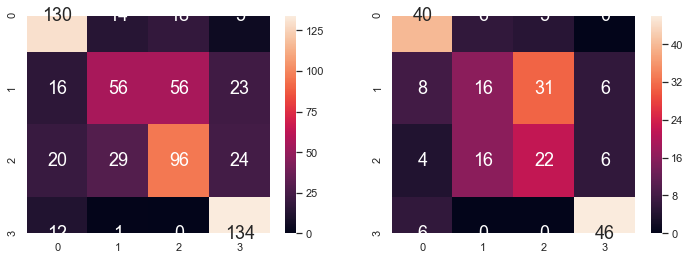

In [21]:
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting

In [22]:
# Import GradientBoostingClassifier model from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   

# Fit Gradient Boosting model on Train Data
gradboost.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9321766561514195

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7735849056603775



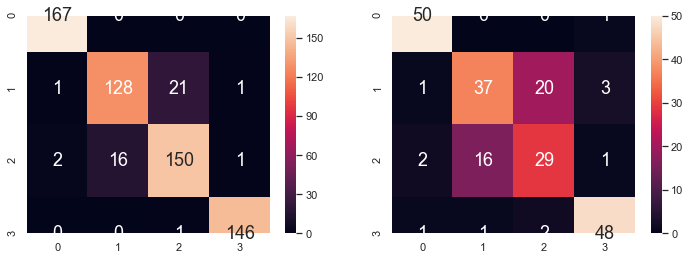

In [23]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = gradboost.predict(X_train)
y_test_pred = gradboost.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# XG Boost

In [24]:
# Import XGBClassifier model from Scikit-Learn
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100,     # n_estimators denote number of trees
                    max_depth = 2,          # Set the maximum depth of each tree
                    gamma=0,                # Regularization parameter: min loss reduction required to make a further partition on a leaf node of the tree
                    learning_rate = 0.1,  # Learning_rate shrinks the contribution of each tree   
                    colsample_bytree = 0.3) # Subsample ratio by number of columns when constructing each tree

# Fit XGBoost on Train Data 
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8927444794952681

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7169811320754716



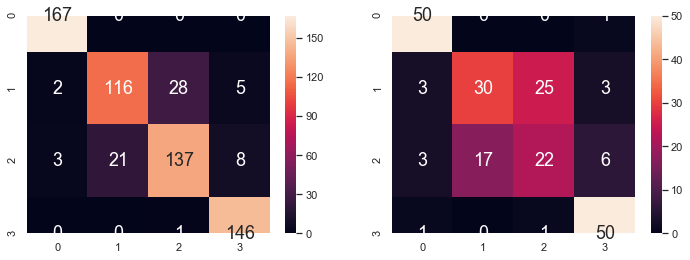

In [25]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Neural Network

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9069400630914827

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7783018867924528


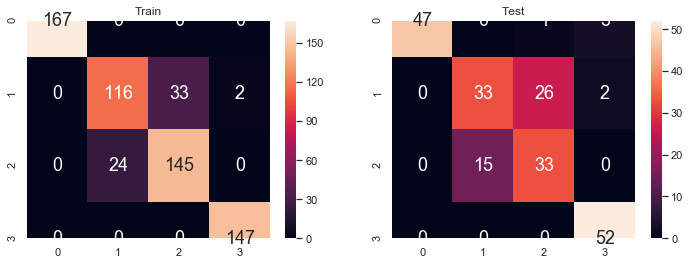

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=600)
mlp.fit(X_train,y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_test, y_test))

# Support Vector Machine

In [27]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [28]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [29]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.8160377358490566
Accuracy Polynomial Kernel: 0.7169811320754716
Accuracy Radial Basis Kernel: 0.6650943396226415
Accuracy Sigmoid Kernel: 0.5094339622641509
